In [1]:
# Upload libreries to work with
#====================================

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [2]:
# Information about the data
#====================================

# This spreadsheet contains a selection of the data tables published alongside the Office for National Statistics' Retail Sales Index for April 2023 . 

In [3]:
# Upload the data
#====================================

df = pd.read_excel('Retail sales pounds data.xlsx', sheet_name='ValNSATD', parse_dates=True, index_col=0)
df

,All Retailing including automotive fuel - All Retailing,All Retailing including automotive fuel - Large Businesses,All Retailing including automotive fuel - Small Businesses,All Retailing excluding automotive fuel - All Retailing,All Retailing excluding automotive fuel - Large Businesses,All Retailing excluding automotive fuel - Small Businesses,Predominantly Food Stores Total - All Businesses,Predominantly Food Stores Total - Large Businesses,Predominantly Food Stores Total - Small Businesses,Non-Specialised Food Stores - All Businesses,Non-Specialised Food Stores - Large Businesses,Non-Specialised Food Stores - Small Businesses,Specialist Food Stores,"Alcoholic and Other beverages, and Tobacco",Predominantly Non-food Stores Total - All Businesses,...,Audio and video and music,Other Non-food Stores - All Businesses,Other Non-food Stores - Large Businesses,Other Non-food Stores - Small Businesses,"Other Retail Sale in Specialised Stores - Pharmaceutical, Medical, Cosmetic and Toilet Goods","Other Retail Sale in Specialised Stores - Books, Newspapers and Periodicals",Other Retail Sale in Specialised Stores - Floor Coverings,Other Retail Sale in Specialised Stores - Computers and Telecommunications,Other Retail Sale in Specialised Stores - Specialised Stores NEC,Non-store Retailing - All Retailing,Non-store Retailing - Large Businesses,Non-store Retailing - Small Businesses,Non-store Retailing - Mail Order Houses,Non-store Retailing - Non-store excluding Mail Order,Automotive fuel
Time Period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986-01-01,NaN,NaN,NaN,9415792,5406797,4008986,3737172,2467995,1269176,2641447,2236027,405420,760625,335100,4873175,...,97825,1408496,426520,981975,133660,224555,160035,235310,654936,805445,413051,392390,563860,241585,NaN
1986-02-01,NaN,NaN,NaN,7279178,4156194,3122988,3092640,2036219,1056428,2184184,1844962,339229,626584,281872,3592464,...,70984,1100484,330676,769809,110828,186612,116576,187736,498732,594074,291432,302645,398622,195452,NaN
1986-03-01,NaN,NaN,NaN,9562899,5517794,4045120,3985511,2642498,1343025,2827506,2394721,432794,789860,368145,4814196,...,89350,1461739,437676,1024064,141890,241925,141235,244805,691884,763192,372125,391064,515472,247720,NaN
1986-04-01,NaN,NaN,NaN,7897661,4533737,3363932,3237323,2143284,1094044,2290627,1941255,349372,649984,296712,4023488,...,71612,1197085,356724,840360,114316,188204,121028,196516,577021,636850,308224,328628,429842,207008,NaN
1986-05-01,NaN,NaN,NaN,7795672,4471568,3324098,3200778,2106750,1094024,2257278,1904106,353164,638236,305264,3975932,...,67016,1190619,347523,843095,119412,181392,118776,184916,586123,618962,295720,323240,412646,206316,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,57668130.0,46381952.0,11286175.0,52854050,42344052,10509997,21192559,18313478,2879083,19429401,17787145,1642246,1285883,477275,24340744,...,114859,7904028,5100302,2803728,1240373,572031,195890,531156,5364578,7320747,5129859,2190884,7010620,310127,4814080.0
2023-01-01,34870631.0,27061425.0,7809202.0,31179772,23969314,7210457,13626566,11671310,1955253,12573987,11337336,1236651,838068,214511,12766780,...,63269,3995707,2217994,1777713,627133,220705,209705,320030,2618134,4786426,3081448,1704978,4572111,214315,3690859.0
2023-02-01,36279356.0,28047923.0,8231431.0,32492276,24869011,7623261,14610402,12474794,2135607,13401211,12111950,1289255,956483,252708,13132654,...,57658,4450279,2446412,2003868,659996,246087,208887,262125,3073184,4749220,3060767,1688450,4523743,225477,3787080.0


In [4]:
# Get information about every feature in the dataset
#======================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 1986-01-01 to 2023-04-01
Data columns (total 49 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   All Retailing including automotive fuel - All Retailing                                       328 non-null    float64
 1   All Retailing including automotive fuel - Large Businesses                                    328 non-null    float64
 2   All Retailing including automotive fuel - Small Businesses                                    328 non-null    float64
 3   All Retailing excluding automotive fuel - All Retailing                                       448 non-null    int64  
 4   All Retailing excluding automotive fuel - Large Businesses                                    448 non-null    int64  
 5   All Retail

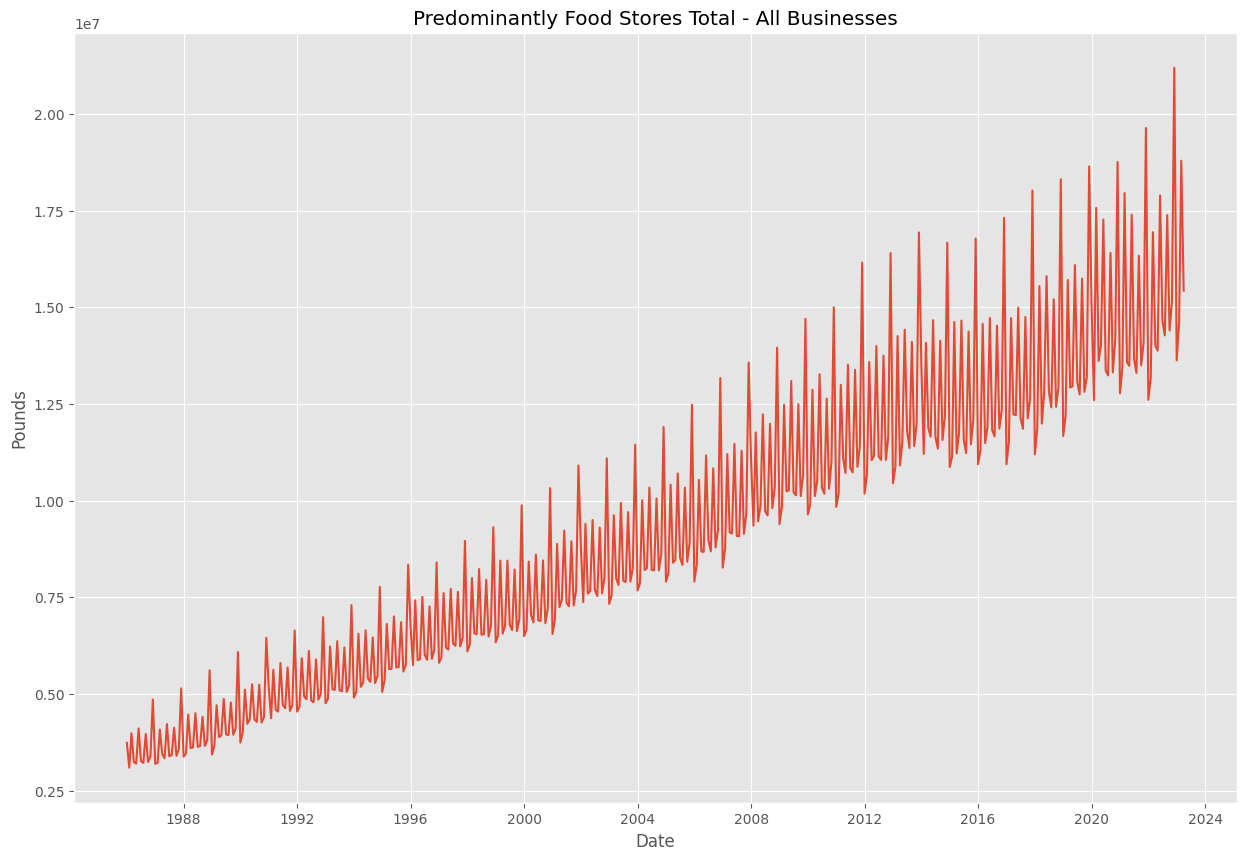

In [5]:
# Let's plot a time series
#====================================================

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df.index, df['Predominantly Food Stores Total - All Businesses'])
ax.set_xlabel('Date')
ax.set_ylabel('Pounds')
ax.set_title('Predominantly Food Stores Total - All Businesses')
plt.show()

In [6]:
# Gathering the data we'll use to fit the models
#====================================================

food_stores = df['Predominantly Food Stores Total - All Businesses']

In [7]:
# Splitting the data in train and test
#====================================================

food_stores_train = food_stores.loc[:'2020-12-01']
food_stores_test = food_stores.loc['2021-01-01':]

## Fitting the Holt-Winters method

In [8]:
# Uploading some libreries to work with Holt-Winters method
#============================================================

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics import tsaplots

import warnings 
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

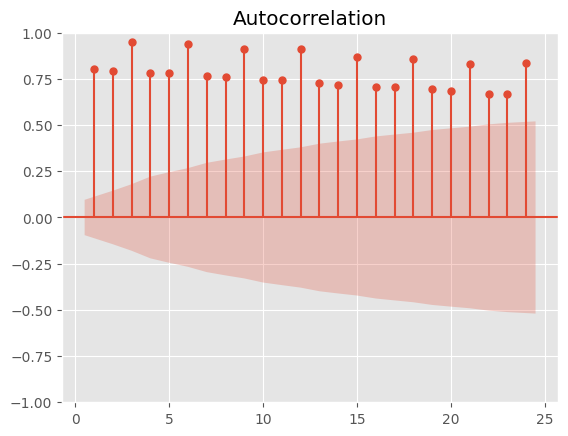

In [9]:
# Find the seasonal pattern in data using ACF

fig = tsaplots.plot_acf(food_stores_train, lags=24, zero=False)
plt.show()

In [10]:
# Fitting the model with seasonal_periods = 4 (number of seasonal periods that ocurrs in a year)
#=================================================

hw = ExponentialSmoothing(food_stores_train, seasonal_periods=4, trend='mul', seasonal='mul').fit()

In [11]:
# Summary of the model
#=============================================

hw.summary()

Dep. Variable:,Predominantly Food Stores Total - All Businesses,No. Observations:,420
Model:,ExponentialSmoothing,SSE,771337576028371.125
Optimized:,True,AIC,11876.335
Trend:,Multiplicative,BIC,11908.657
Seasonal:,Multiplicative,AICC,11876.873
Seasonal Periods:,4,Date:,"Wed, 02 Aug 2023"
Box-Cox:,False,Time:,16:31:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0403571,beta,True


In [12]:
# Concatenate fitted values in the original dataframe
#=================================================

food_stores_hw = pd.DataFrame({'Predominantly Food Stores Total - All Businesses':food_stores_train,\
                            'Holt-Winters':hw.fittedvalues})
food_stores_hw

,Predominantly Food Stores Total - All Businesses,Holt-Winters
Time Period,,
1986-01-01,3737172,3.237717e+06
1986-02-01,3092640,3.556730e+06
1986-03-01,3985511,3.575546e+06
1986-04-01,3237323,3.587646e+06
1986-05-01,3200778,3.363859e+06
...,...,...
2020-08-01,13236593,1.516348e+07
2020-09-01,16405467,1.412814e+07
2020-10-01,13314368,1.437730e+07


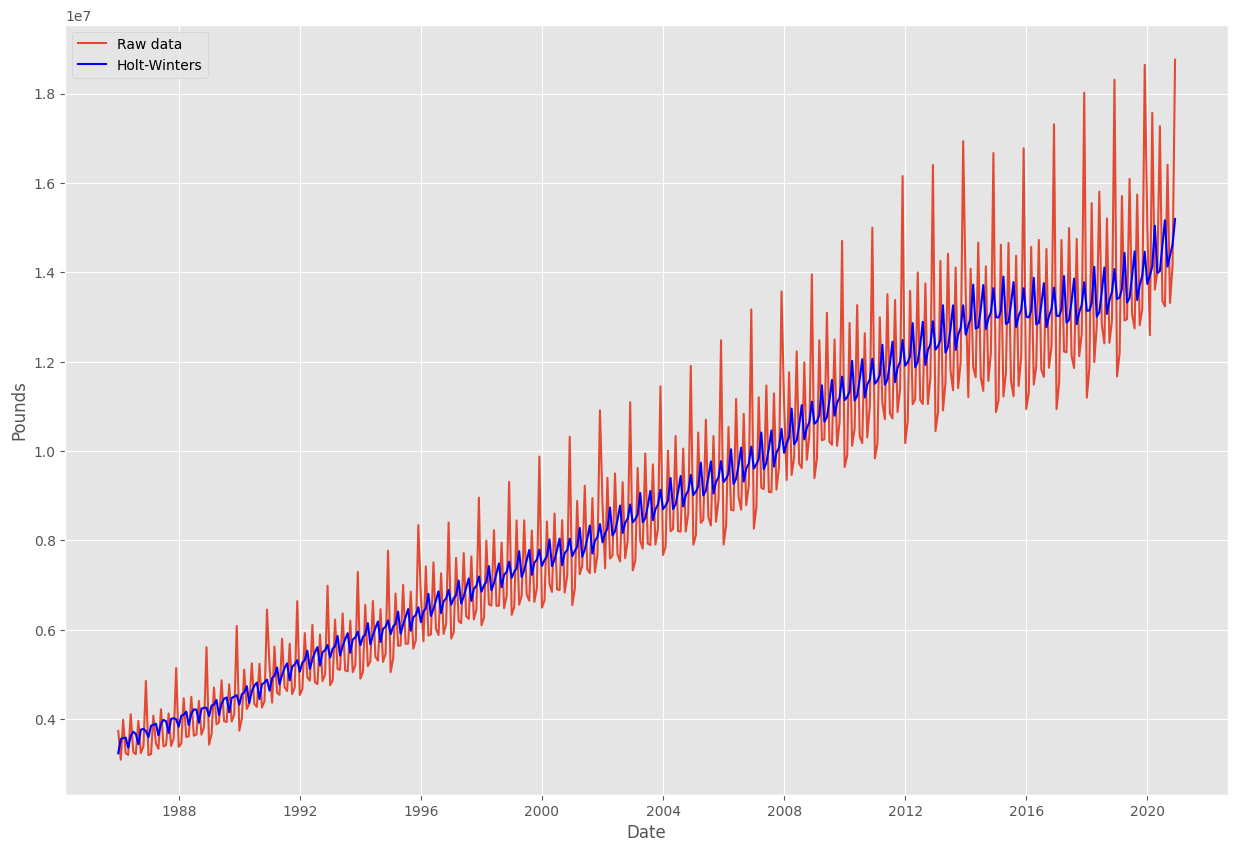

In [13]:
# Plot the orginal data and the data from the model
#========================================================

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(food_stores_hw.index, food_stores_hw['Predominantly Food Stores Total - All Businesses'], label='Raw data')
ax.plot(food_stores_hw.index, food_stores_hw['Holt-Winters'], color='blue', label='Holt-Winters')
ax.set_xlabel('Date')
ax.set_ylabel('Pounds')
ax.legend()

plt.show()

In [14]:
# Computing errors
#====================================

food_stores_hw['errors'] = food_stores_hw['Predominantly Food Stores Total - All Businesses'] - food_stores_hw['Holt-Winters']
food_stores_hw

,Predominantly Food Stores Total - All Businesses,Holt-Winters,errors
Time Period,,,
1986-01-01,3737172,3.237717e+06,4.994552e+05
1986-02-01,3092640,3.556730e+06,-4.640902e+05
1986-03-01,3985511,3.575546e+06,4.099654e+05
1986-04-01,3237323,3.587646e+06,-3.503231e+05
1986-05-01,3200778,3.363859e+06,-1.630806e+05
...,...,...,...
2020-08-01,13236593,1.516348e+07,-1.926882e+06
2020-09-01,16405467,1.412814e+07,2.277329e+06
2020-10-01,13314368,1.437730e+07,-1.062933e+06


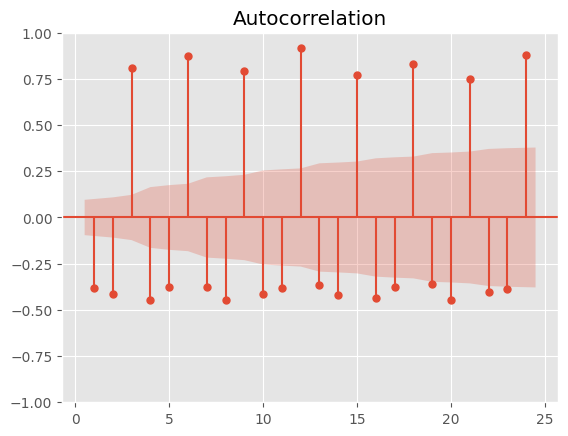

In [15]:
# Plotting ACF for errors
#=========================================

fig = tsaplots.plot_acf(food_stores_hw['errors'], lags=24, zero=False)
plt.show()

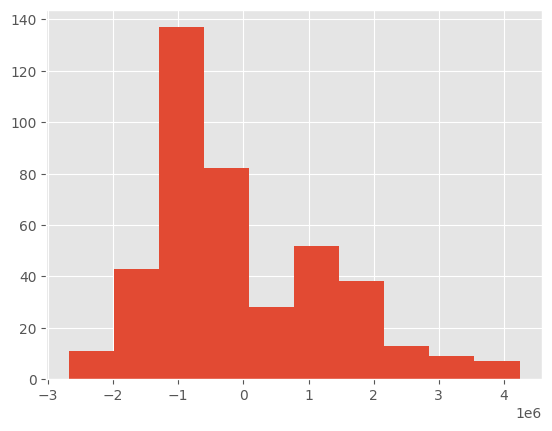

In [16]:
# Normalcy in errors?
#========================================

food_stores_hw['errors'].hist()
plt.show()

In [17]:
# Forecasting
#=========================================

hw_forecast = hw.forecast(len(food_stores_test))

In [18]:
# Creating functions to calculate metrics of the model
#==========================================

def computing_MAD(col_value, col_forecast_value):
    MAD = abs(col_value - col_forecast_value).sum()/len(col_value)
    return MAD
    
def computing_MAPE(col_value, col_forecast_value):
    MAPE = abs((col_value - col_forecast_value)/col_value).sum()*100/len(col_value)
    return MAPE

def computing_MPE(col_value, col_forecast_value):
    MPE = ((col_value - col_forecast_value)/col_value).sum()*100/len(col_value)
    return MPE

In [19]:
# Testing the model
#================================================

from sklearn.metrics import mean_squared_error as MSE

MAD = computing_MAD(food_stores_test, hw_forecast)
mse = MSE(food_stores_test, hw_forecast)
MAPE = computing_MAPE(food_stores_test, hw_forecast)
MPE = computing_MPE(food_stores_test, hw_forecast)

print(f'MAD value is: {MAD:.2f}')
print(f'MSE value is: {mse:.2f}')
print(f'RMSE value is: {mse**.5:.2f}')
print(f'MAPE value is: {MAPE:.2f}')
print(f'MPE value is: {MPE:.2f}')

MAD value is: 1893392.83
MSE value is: 4470645160862.29
RMSE value is: 2114390.02
MAPE value is: 12.13
MPE value is: -2.42


## Descomposition of the time series

In [20]:
# Fitting a polynomial to the data to estimate the trend
#=============================================

order = 1
coefs = np.polyfit(x=np.arange(len(food_stores_train)), y=food_stores_train, deg=order)

In [21]:
# Computing train ajusted values
#==============================================

x_train = np.arange(len(food_stores_train))

y_train = coefs[0]*x_train + coefs[1]

In [22]:
# Computing test ajusted values
#==============================================

x_test = np.arange(max(x_train) + 1, len(food_stores))

y_test = coefs[0]*x_test + coefs[1]

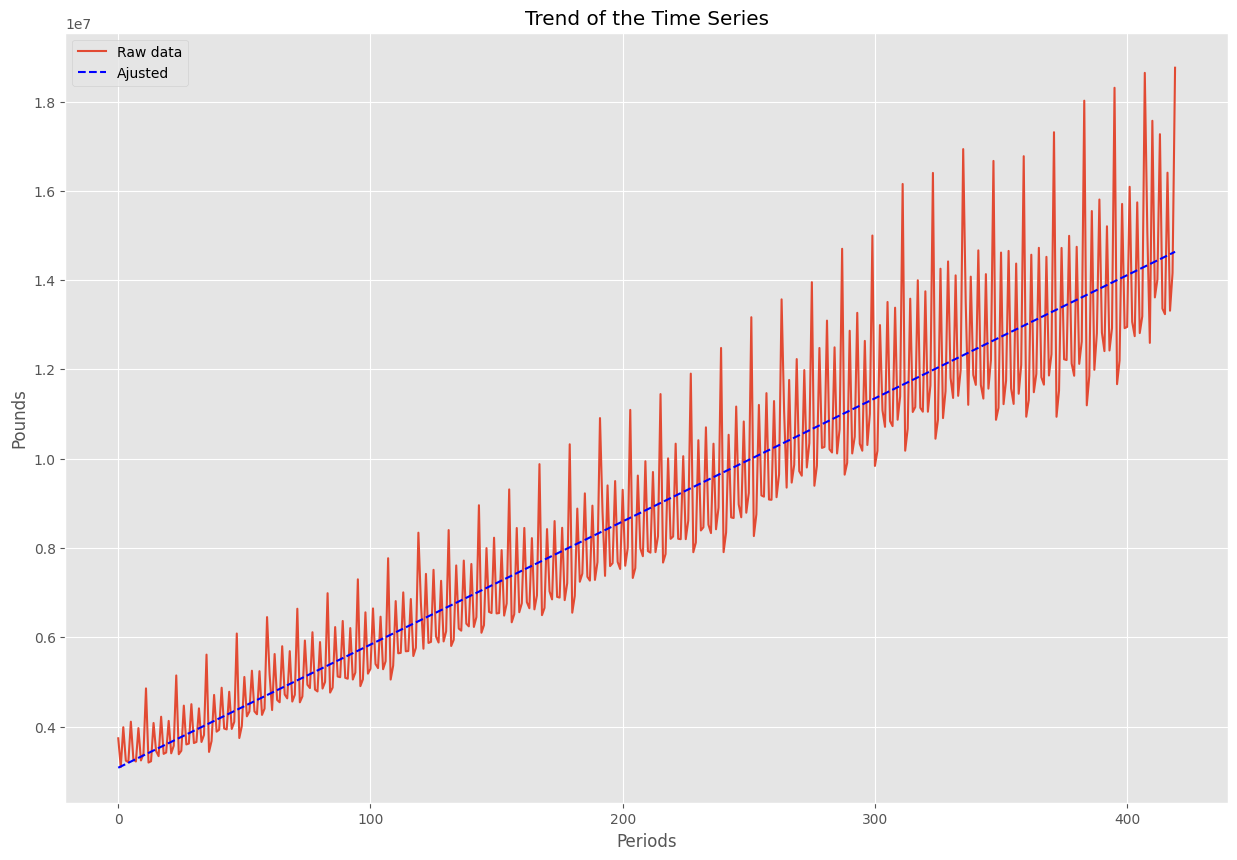

In [23]:
# Plotting the raw data and the ajusted
#==============================================

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_train, food_stores_train, label='Raw data')
ax.plot(x_train, y_train, '--', label='Ajusted', color='blue')
ax.set_ylabel('Pounds')
ax.set_xlabel('Periods')
ax.set_title('Trend of the Time Series')
ax.legend()

plt.show()

In [24]:
# Creating the seasonal class
#======================================

class SeasonalDecompose:
    def __init__(self, model, data, freq):
        self.model = model
        self.data = data.copy()
        self.freq = freq
        
    def preparing_data(self):
        table = pd.DataFrame({'Month':self.data.index.to_series().apply(lambda x: x.strftime('%b')),\
                              'Year':self.data.index.to_series().apply(lambda x: int(x.strftime('%Y'))),\
                              'Value':self.data})
        return table
        
    def computing_index_numbers(self):
        n = int(self.freq/2)
        table = self.preparing_data()
        years = max(table.Year) - min(table.Year) + 1
        table[f'Total {self.freq} months'] = table['Value'].rolling(window=self.freq).sum().shift(-n)
        table[f'Total of {years} years'] = table[f'Total {self.freq} months'].rolling(window=2).sum()
        table[f'Centered MA of {self.freq} months'] = table[f'Total of {years} years']/(years*12)
        if self.model == 'mul':
            table['Seasonal Index'] = table['Value']/table['Centered MA of 12 months']
        else:
            table['Seasonal Index'] = table['Value'] - table['Centered MA of 12 months']
        idx = table.groupby('Month')['Seasonal Index'].median()
        seasonal_idx = idx*(12/idx.sum())
        numeric = [dt.datetime.strptime(i, '%b').month for i in seasonal_idx.index]
        seasonal_idx = pd.DataFrame({'Month':seasonal_idx.index, 'Value':seasonal_idx.values}, index=numeric)
        seasonal_idx.sort_index(inplace=True)
        seasonal_idx = seasonal_idx.reset_index(drop=True)
        
        return {'table':table, 'seasonal index':seasonal_idx}            

In [25]:
# Creating a function to plot seasonal indexes
#===============================================

def plotting_seasonal_indexes(data):
    fig, ax = plt.subplots()

    ax.plot(data.Month, data.Value, '-o')
    ax.hlines(y=1, xmin='Jan', xmax='Dec', colors='blue', linestyles='--')
    ax.set_ylabel('Index')
    ax.set_title('Seasonal Indexes')

    plt.show()

In [26]:
# Computing ajusted values for the model
#==============================================

def computing_ajusted_values(data, table, y):
    years = max(table.Year) - min(table.Year) + 1
    series_index = pd.concat([data.Value]*years, ignore_index=True)
    ajusted_values_model = y*series_index
    return ajusted_values_model, series_index

In [27]:
# Plotting raw data vs model values
#===========================================

def plotting_raw_data_and_model(x, y_ajusted_model, data_train):
    fig, ax = plt.subplots(figsize=(15,10))

    ax.plot(x, data_train, alpha=.7, label='Raw data')
    ax.plot(x, y_ajusted_model, '--', color='blue', label='Model')
    ax.set_xlabel('Periods')
    ax.set_ylabel('Pounds')
    ax.set_title('Time Series')
    ax.legend()

    plt.show()

In [28]:
objc = SeasonalDecompose('mul', food_stores_train, 12)
table = objc.preparing_data()
dictionary = objc.computing_index_numbers()

In [29]:
ajusted_values, series_index = computing_ajusted_values(dictionary['seasonal index'], table, y_train)

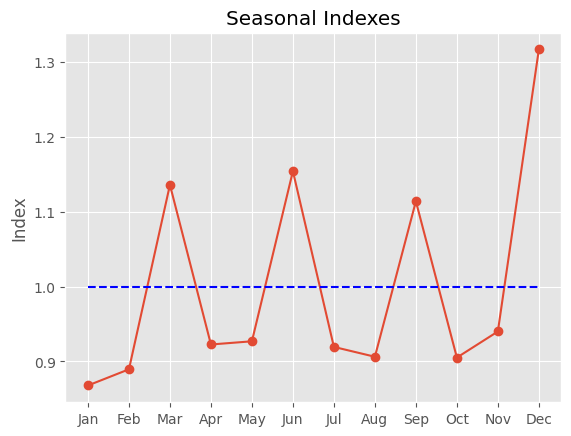

In [30]:
plotting_seasonal_indexes(dictionary['seasonal index'])

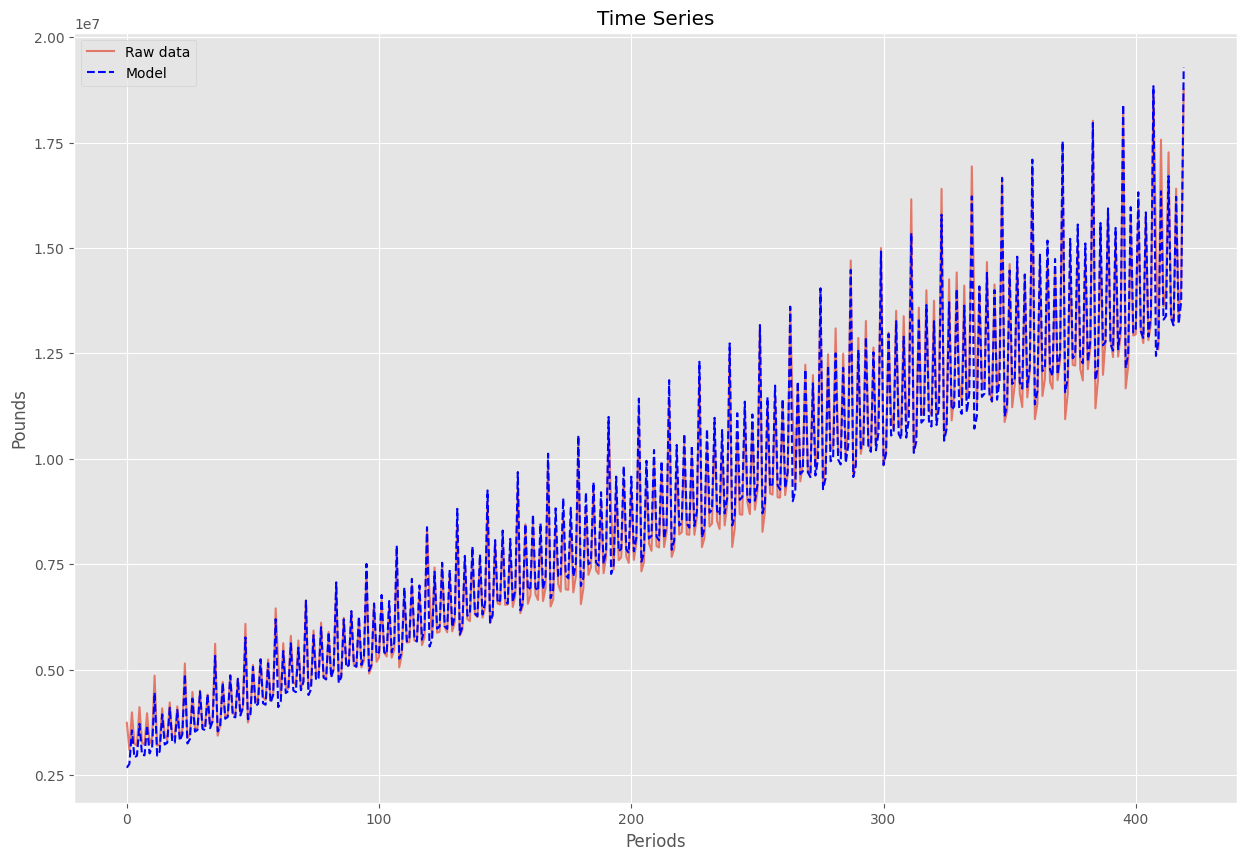

In [31]:
plotting_raw_data_and_model(x_train, ajusted_values, food_stores_train)

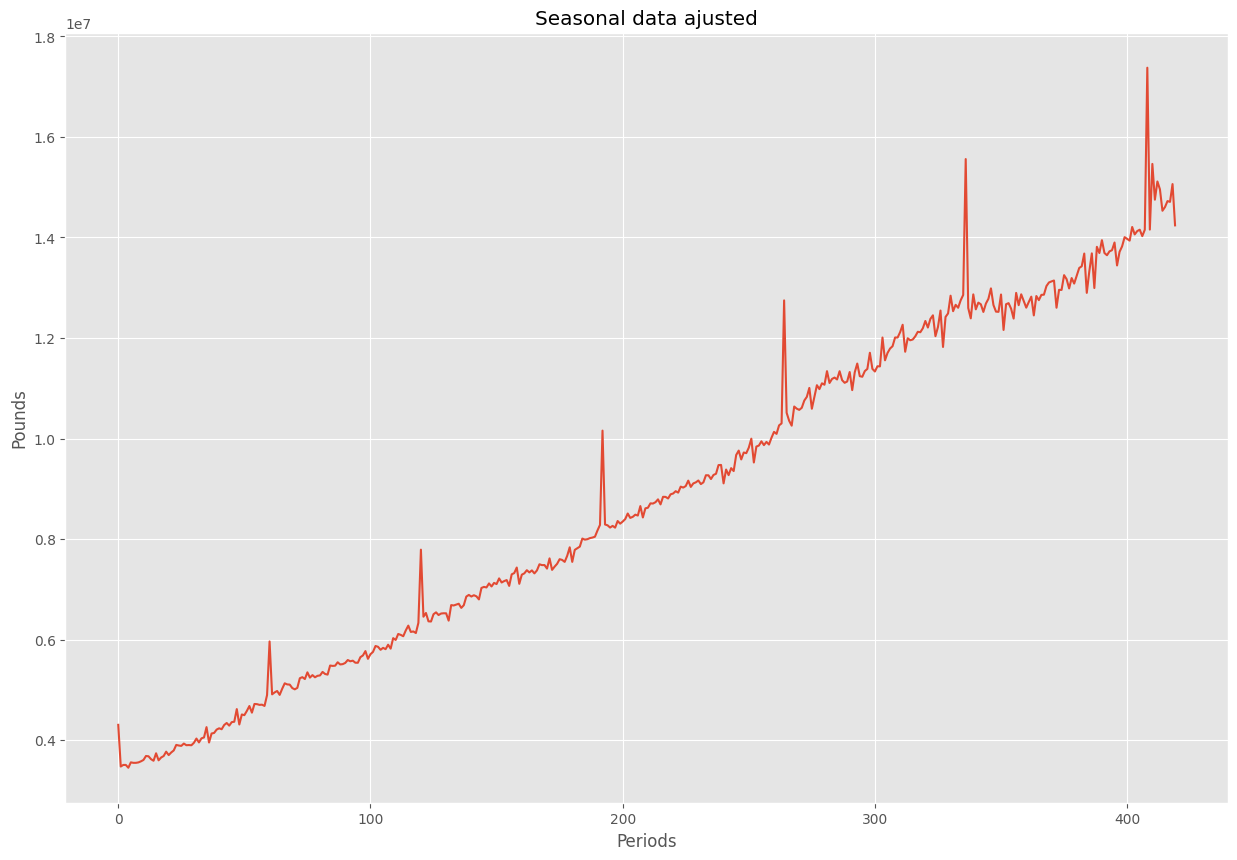

In [32]:
# Removing seasonal component
#=======================================

deseasonal = food_stores_train.reset_index(drop=True)/series_index
fig = plt.subplots(figsize=(15,10))
ax = deseasonal.plot(kind='line')
ax.set_xlabel('Periods')
ax.set_ylabel('Pounds')
ax.set_title('Seasonal data ajusted')
plt.show()

In [33]:
# Forecasting
#=========================================

def forecasting(y_test, series_index, original_data):
    n = len(np.arange(max(series_index.reset_index().index) + 1, max(original_data.reset_index().index) + 1))
    seasonal = series_index[:n]
    forecast = y_test*seasonal
    m = np.arange(max(series_index.reset_index().index) + 1, max(original_data.reset_index().index) + 1)
    forecast = forecast.rename(index=dict(zip(forecast.index, m)))
    
    return forecast

In [34]:
# Plotting the forecasting
#=======================================

def plotting_forecasting(forecast, original_data, train_data, ajusted_values):
    fig, ax = plt.subplots(figsize=(15,10))
    
    ax.plot(original_data.reset_index().index, original_data, alpha=.7, label='Raw data')
    ax.plot(np.arange(max(train_data.reset_index().index) + 1, max(original_data.reset_index().index) + 1),\
            forecast, '--', color='green', label='Forecast')
    ax.set_xlabel('Periods')
    ax.set_ylabel('Pounds')
    ax.set_title('Forecasting vs Raw data')
    ax.legend()
    
    plt.show()

In [35]:
forecast = forecasting(y_test, series_index, food_stores)

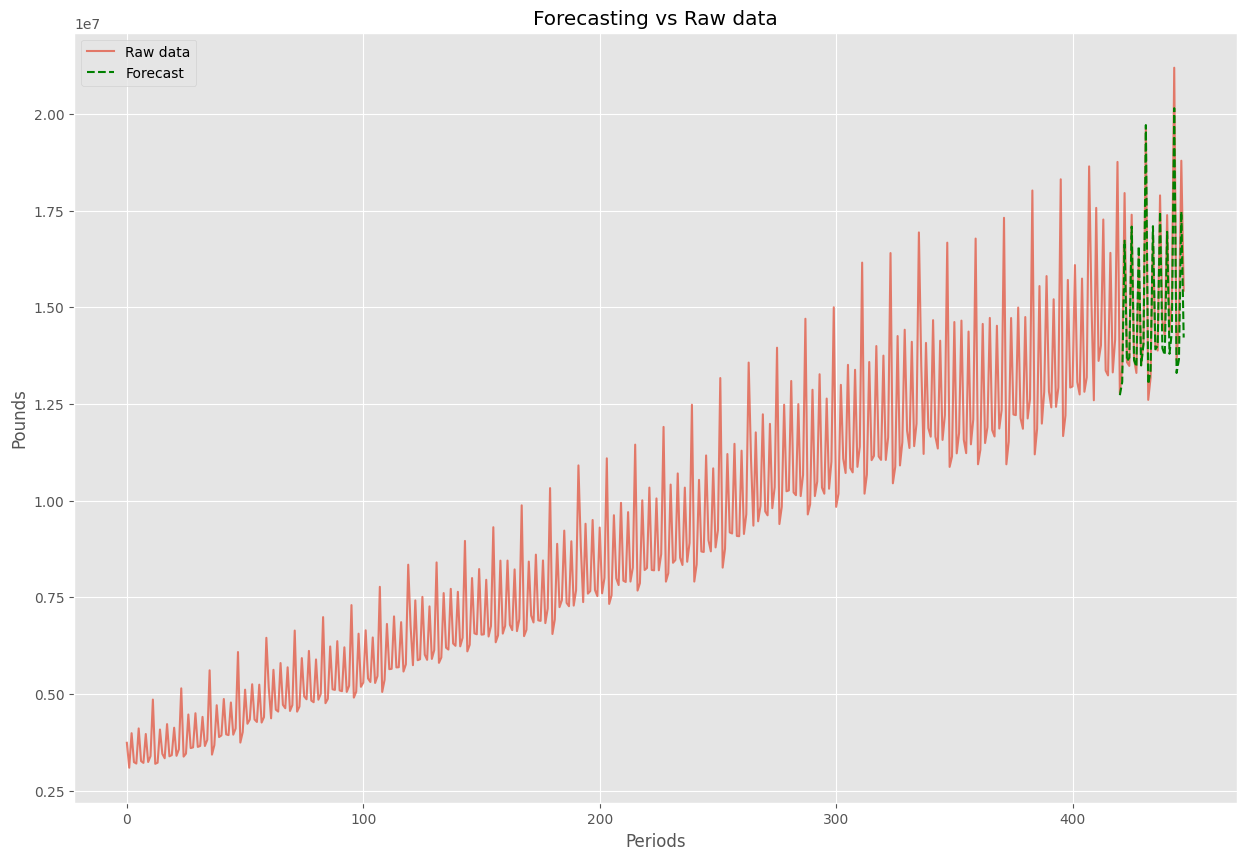

In [36]:
plotting_forecasting(forecast, food_stores, food_stores_train, ajusted_values)

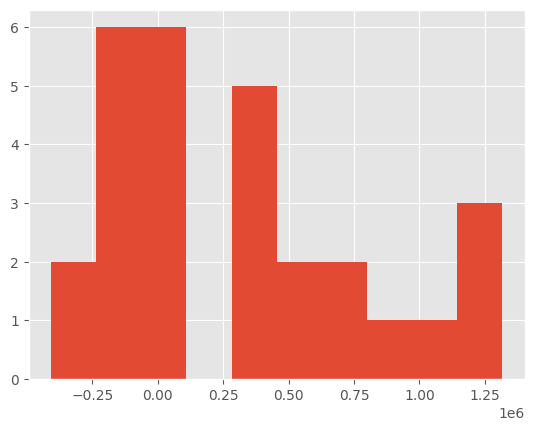

In [37]:
# Normalcy in residuals?
#================================

residuals = food_stores_test.reset_index(drop=True) - forecast.reset_index(drop=True)
residuals.hist()
plt.show()

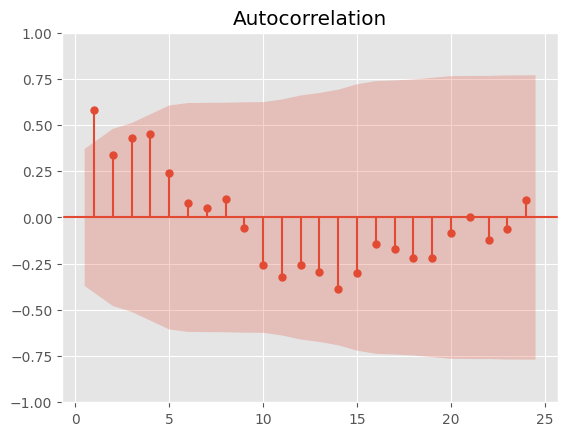

In [38]:
# ACF for residuals
#===========================================

fig = tsaplots.plot_acf(residuals, lags=24, zero=False)
plt.show()

In [39]:
# testing the model
#==========================

MAD = computing_MAD(food_stores_test, forecast)
mse = MSE(food_stores_test, forecast)
MAPE = computing_MAPE(food_stores_test, forecast)
MPE = computing_MPE(food_stores_test, forecast)

print(f'MAD value is: {MAD:.8f}')
print(f'MSE value is: {mse:.8f}')
print(f'RMSE value is: {mse**.5:.8f}')
print(f'MAPE value is: {MAPE:.8f}')
print(f'MPE value is: {MPE:.8f}')

MAD value is: 0.00000000
MSE value is: 341509110912.45245361
RMSE value is: 584387.80866172
MAPE value is: 0.00000000
MPE value is: 0.00000000


## Seasonal ARIMA Model

In [40]:
# Import the librery
#==================================

import pmdarima as pm

In [41]:
# Creating the model
#==================================

model = pm.auto_arima(food_stores_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=11656.765, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11885.803, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11729.334, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=11654.982, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=11734.760, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=11656.721, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=11656.706, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=11671.913, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=11658.651, Time=0.88 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=11822.383, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=11654.994, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=11715.953, Time=0.12 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=11656.543, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=11658.395, Time=0.16 sec

Best

In [42]:
# Training the model
#=======================================

model.fit(food_stores_train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [43]:
# Forecasting
#======================================

forecast_sarima = model.predict(n_periods=28)
forecast_sarima

2021-01-01    1.412883e+07
2021-02-01    1.310593e+07
2021-03-01    1.735214e+07
2021-04-01    1.387841e+07
2021-05-01    1.420783e+07
2021-06-01    1.735328e+07
2021-07-01    1.389775e+07
2021-08-01    1.367322e+07
2021-09-01    1.672151e+07
2021-10-01    1.375900e+07
2021-11-01    1.440710e+07
2021-12-01    1.937396e+07
2022-01-01    1.456113e+07
2022-02-01    1.353824e+07
2022-03-01    1.778445e+07
2022-04-01    1.431072e+07
2022-05-01    1.464013e+07
2022-06-01    1.778559e+07
2022-07-01    1.433006e+07
2022-08-01    1.410552e+07
2022-09-01    1.715381e+07
2022-10-01    1.419131e+07
2022-11-01    1.483941e+07
2022-12-01    1.980627e+07
2023-01-01    1.499344e+07
2023-02-01    1.397054e+07
2023-03-01    1.821675e+07
2023-04-01    1.474303e+07
Freq: MS, dtype: float64

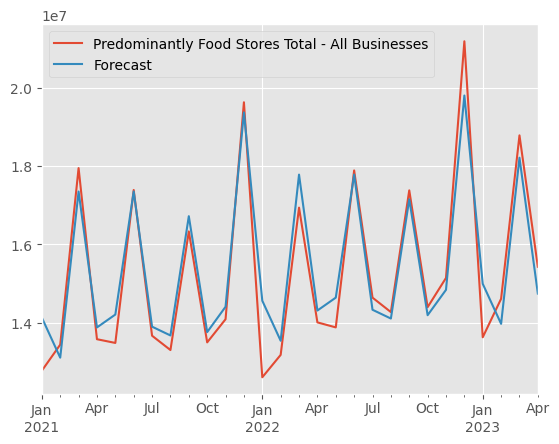

In [44]:
# Plotting forecast vs raw data
#================================================

forecast_sarima = pd.DataFrame(forecast_sarima, index=forecast_sarima.index, columns=['Forecast'])

pd.concat([food_stores_test, forecast_sarima], axis=1).plot()
plt.show()

In [45]:
# Concatenating forecast and raw data
#===============================================

table = pd.concat([food_stores_test, forecast_sarima], axis=1)
table['resid'] = table['Predominantly Food Stores Total - All Businesses'] - table['Forecast']
table

,Predominantly Food Stores Total - All Businesses,Forecast,resid
2021-01-01,12772962,1.412883e+07,-1.355866e+06
2021-02-01,13438381,1.310593e+07,3.324498e+05
2021-03-01,17951519,1.735214e+07,5.993790e+05
2021-04-01,13577448,1.387841e+07,-3.009665e+05
2021-05-01,13482052,1.420783e+07,-7.257738e+05
2021-06-01,17391620,1.735328e+07,3.833930e+04
2021-07-01,13666487,1.389775e+07,-2.312666e+05
2021-08-01,13300735,1.367322e+07,-3.724815e+05
2021-09-01,16331969,1.672151e+07,-3.895385e+05
2021-10-01,13496393,1.375900e+07,-2.626055e+05


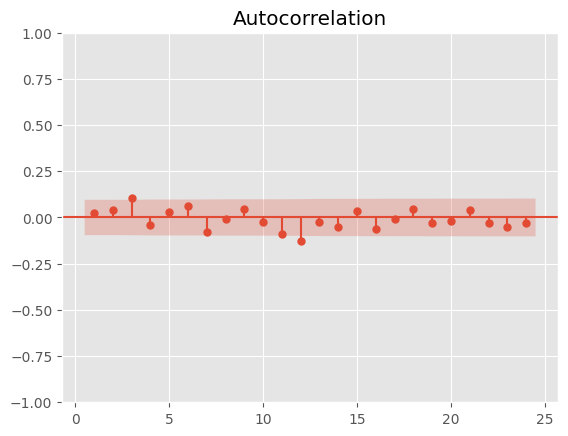

In [46]:
# Plotting ACF
#=============================

fig = tsaplots.plot_acf(model.resid(), lags=24, zero=False)
plt.show()

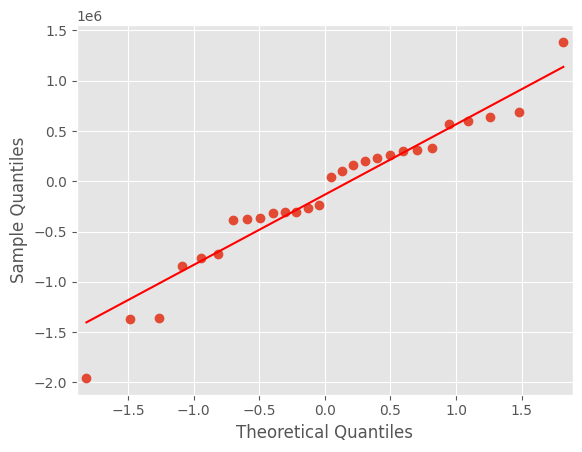

In [47]:
# Testing Normalcy
#================================

import statsmodels.api as sm

sm.qqplot(table.resid, line = 's')
plt.show()

In [48]:
# Anderson-Darling test
#======================================

from scipy import stats
from colorama import Fore, Style

def testing_Anderson_Darling(model):
    
    for i in range(len(stats.anderson(model.resid)[1])):
        statistic = stats.anderson(model.resid)[0]
        alpha = stats.anderson(model.resid)[2][i]
    
        if statistic < stats.anderson(model.resid)[1][i]:
            print(Fore.BLUE +
              f'{i + 1}. Accept the null hypothesis H\u2092. \nStatistic = {statistic:.2f} < {stats.anderson(model.resid)[1][i]} for \u03B1 = {alpha}'
              + Style.RESET_ALL)
        else:
            print(Fore.RED +
              f'{i + 1}. Reject the null hypothesis H\u2092. \nStatistic = {statistic:.2f} > {stats.anderson(model.resid)[1][i]} for \u03B1 = {alpha}'
              + Style.RESET_ALL) 

In [49]:
testing_Anderson_Darling(table)

1. Accept the null hypothesis Hₒ. 
Statistic = 0.49 < 0.518 for α = 15.0
2. Accept the null hypothesis Hₒ. 
Statistic = 0.49 < 0.59 for α = 10.0
3. Accept the null hypothesis Hₒ. 
Statistic = 0.49 < 0.708 for α = 5.0
4. Accept the null hypothesis Hₒ. 
Statistic = 0.49 < 0.826 for α = 2.5
5. Accept the null hypothesis Hₒ. 
Statistic = 0.49 < 0.983 for α = 1.0


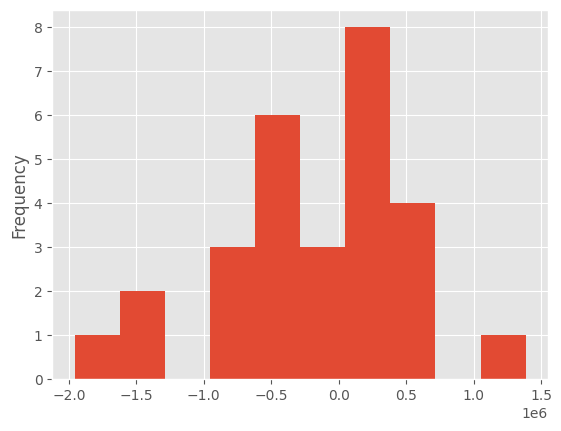

In [50]:
# Histogram of residuals
#=================================

table.resid.plot(kind='hist')
plt.show()

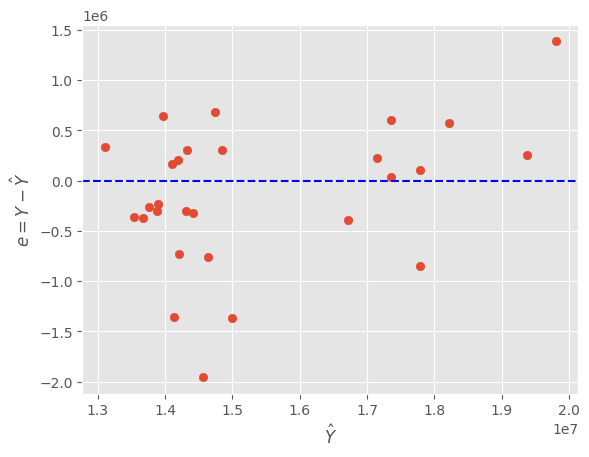

In [51]:
# Homoscedasticity or Heteroscedasticity?
#=====================================================

fig, ax = plt.subplots()

ax.scatter(table.Forecast, table.resid)
ax.axhline(0, color = 'blue', linestyle = '--')
ax.set_xlabel('$\hat{Y}$')
ax.set_ylabel('$e = Y - \hat{Y}$')

plt.show()

In [52]:
# Testing the model
#=================================

MAD = computing_MAD(food_stores_test, table.Forecast)
mse = MSE(food_stores_test, table.Forecast)
MAPE = computing_MAPE(food_stores_test, table.Forecast)
MPE = computing_MPE(food_stores_test, table.Forecast)

print(f'MAD value is: {MAD:.2f}')
print(f'MSE value is: {mse:.2f}')
print(f'RMSE value is: {mse**.5:.2f}')
print(f'MAPE value is: {MAPE:.2f}')
print(f'MPE value is: {MPE:.2f}')

MAD value is: 549332.03
MSE value is: 506009820698.04
RMSE value is: 711343.67
MAPE value is: 3.74
MPE value is: -1.28
